In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 

### Points to consider
Noticing that the fluxes are giving trash values for a lot of the points so thats frustrating. 

In [25]:
### Get the merged files
os.chdir("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Test_files\\All\\")
file_list=os.listdir()
inst_data=[]
name_inst=[]
for i in range(len(file_list)):
    inst_data.append(pd.read_csv(file_list[i],parse_dates=["Date"]))
    name_inst.append(file_list[i].split(".")[0])


In [26]:
## Let's process this a little bit, remove absurd LE and H values from GEESEBAL
for i in range(len(file_list)):
    print("Before processing",inst_data[i].shape[0])
    inst_data[i]=inst_data[i][inst_data[i]["LEinst"]>=-30]
    inst_data[i]=inst_data[i][inst_data[i]["Hinst"]>=-40]
    # print(inst_data[i]["LEinst"].describe())
    print("After processing",inst_data[i].shape[0])


Before processing 260
After processing 139
Before processing 314
After processing 222
Before processing 303
After processing 210
Before processing 247
After processing 149
Before processing 75
After processing 19
Before processing 6
After processing 0
Before processing 193
After processing 88
Before processing 124
After processing 78
Before processing 261
After processing 157
Before processing 201
After processing 96
Before processing 126
After processing 83
Before processing 391
After processing 236
Before processing 387
After processing 0
Before processing 395
After processing 239
Before processing 129
After processing 80
Before processing 129
After processing 88
Before processing 119
After processing 69
Before processing 100
After processing 55
Before processing 115
After processing 81
Before processing 319
After processing 187
Before processing 130
After processing 78
Before processing 130
After processing 75
Before processing 130
After processing 73
Before processing 252
After pro

In [39]:
#### Import the daily values
os.chdir("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Daily_Closed\\")
file_list=os.listdir()
daily_data=[]
name_daily=[]
for i in range(len(file_list)):
    daily_data.append(pd.read_csv(file_list[i],parse_dates=["Date"]))
    name_daily.append(file_list[i].split(".")[0])


In [ ]:
for i in range(len(file_list)):
    daily_data[i]=daily_data[i][["Date","LE_closed","LE_unclosed","H_closed","H_unclosed","G_unclosed","Rn_unclosed","Name"]]

In [46]:
## get average stats of all the stats
## Now the column names are not the same so we extract all cthe variations of the columns names 
## Then we basically take the most popular column name as first choice and if that doesn't work 
# we take the first element of each list. 
le=[] # this iscorrect
h=[] # this also ok
sw_in_list=[]
sw_out_list=[]
TA_list=[]
RH_list=[]
LW_IN_list=[]
LW_OUT_list=[]
NETRAD_list=[]
g=[]
swc=[]
p=[]
# g=[] # this is wrong
for i in range(len(inst_data)):
    le.append(sorted([col for col in inst_data[i].columns if "LE"==col.split("_")[0]],key=len))
#     g.append(sorted([col for col in inst_data[i].columns if "G" in col],key=len))
    h.append(sorted([col for col in inst_data[i].columns if "H"==col.split("_")[0]],key=len))
    g.append(sorted([col for col in inst_data[i].columns if "G"==col.split("_")[0]],key=len))
    sw_in_list.append(sorted([col for col in inst_data[i].columns if "SW_IN" in col],key=len))
    sw_out_list.append(sorted([col for col in inst_data[i].columns if "SW_OUT" in col],key=len))
    TA_list.append(sorted([col for col in inst_data[i].columns if col.startswith("TA_")],key=len))
    RH_list.append(sorted([col for col in inst_data[i].columns if "RH"==col.split("_")[0]],key=len))
    LW_IN_list.append(sorted([col for col in inst_data[i].columns if "LW_IN" in col],key=len))
    LW_OUT_list.append(sorted([col for col in inst_data[i].columns if "LW_OUT" in col],key=len))
    NETRAD_list.append(sorted([col for col in inst_data[i].columns if "NETRAD" in col],key=len))
    swc.append(sorted([col for col in inst_data[i].columns if "SWC"==col.split("_")[0]],key=len))
    p.append(sorted([col for col in inst_data[i].columns if "P"==col.split("_")[0] ],key=len))

In [47]:
netrad_col=[]
le_col=[]
h_col=[]
g_col=[]
swc_col=[]
p_col=[]
# swc_col=[]
## Filter columns based on nan values
for i in range(len(inst_data)):
    a=inst_data[i][NETRAD_list[i]].isna().sum()
    netrad_col.append(a.idxmin())
    a=inst_data[i][le[i]].isna().sum()
    le_col.append(a.idxmin())    
    a=inst_data[i][h[i]].isna().sum()
    h_col.append(a.idxmin())
    a=inst_data[i][g[i]].isna().sum()
    g_col.append(a.idxmin())
    a=inst_data[i][swc[i]].isna().sum()
    swc_col.append(a.idxmin())
    # p[i].remove("P_calc")
    # print(p[i])
    # a=inst_data[i][p[i]].isna().sum()
    # p_col.append(a.idxmin())
        

In [52]:
## Some columns have test QC names in it -- os fixing that
for i in range(len(inst_data)):
    if le_col[i]=="LE_SSITC_TEST_1_1_1" or le_col[i]=="LE_SSITC_TEST":
        print(i)
le_col[6]="LE"
h_col[6]="H"

['H', 'H_SSITC_TEST']

In [58]:
merged_data=[]
name_merged=[]
for i in range(len(daily_data)):
    for j in range(len(inst_data)):
        if name_daily[i]==name_inst[j]:
            merged_data.append(pd.merge(daily_data[i],inst_data[j],on="Date",how="inner"))
            name_merged.append(name_daily[i])
for i in range(len(merged_data)):
    print(merged_data[i].shape[0])
    merged_data[i]["Name"]=name_merged[i]

In [70]:
## Only get coinciding stations
# for i in range(len(fi))
# print(daily_data[0].columns.to_list())
print(merged_data[16][["Name","Name_x"]])

      Name  Name_x
0   US-Mo1  US-Mo1
1   US-Mo1  US-Mo1
2   US-Mo1  US-Mo1
3   US-Mo1  US-Mo1
4   US-Mo1  US-Mo1
5   US-Mo1  US-Mo1
6   US-Mo1  US-Mo1
7   US-Mo1  US-Mo1
8   US-Mo1  US-Mo1
9   US-Mo1  US-Mo1
10  US-Mo1  US-Mo1
11  US-Mo1  US-Mo1
12  US-Mo1  US-Mo1
13  US-Mo1  US-Mo1
14  US-Mo1  US-Mo1
15  US-Mo1  US-Mo1
16  US-Mo1  US-Mo1
17  US-Mo1  US-Mo1
18  US-Mo1  US-Mo1
19  US-Mo1  US-Mo1
20  US-Mo1  US-Mo1
21  US-Mo1  US-Mo1
22  US-Mo1  US-Mo1
23  US-Mo1  US-Mo1
24  US-Mo1  US-Mo1
25  US-Mo1  US-Mo1
26  US-Mo1  US-Mo1
27  US-Mo1  US-Mo1
28  US-Mo1  US-Mo1
29  US-Mo1  US-Mo1
30  US-Mo1  US-Mo1
31  US-Mo1  US-Mo1
32  US-Mo1  US-Mo1
33  US-Mo1  US-Mo1
34  US-Mo1  US-Mo1
35  US-Mo1  US-Mo1
36  US-Mo1  US-Mo1
37  US-Mo1  US-Mo1
38  US-Mo1  US-Mo1
39  US-Mo1  US-Mo1
40  US-Mo1  US-Mo1


In [84]:
for i in range(len(merged_data)):
    merged_data[i].rename(columns={le_col[i]:"LE_inst_af",h_col[i]:"H_inst_af",g_col[i]:"G_inst_af",netrad_col[i]:"Rn_inst_af"},inplace=True)

In [85]:
## Print
for i in range(len(merged_data)):
    merged_data[i].to_csv("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Merge_inst_sebal_daily\\"+name_merged[i]+".csv")

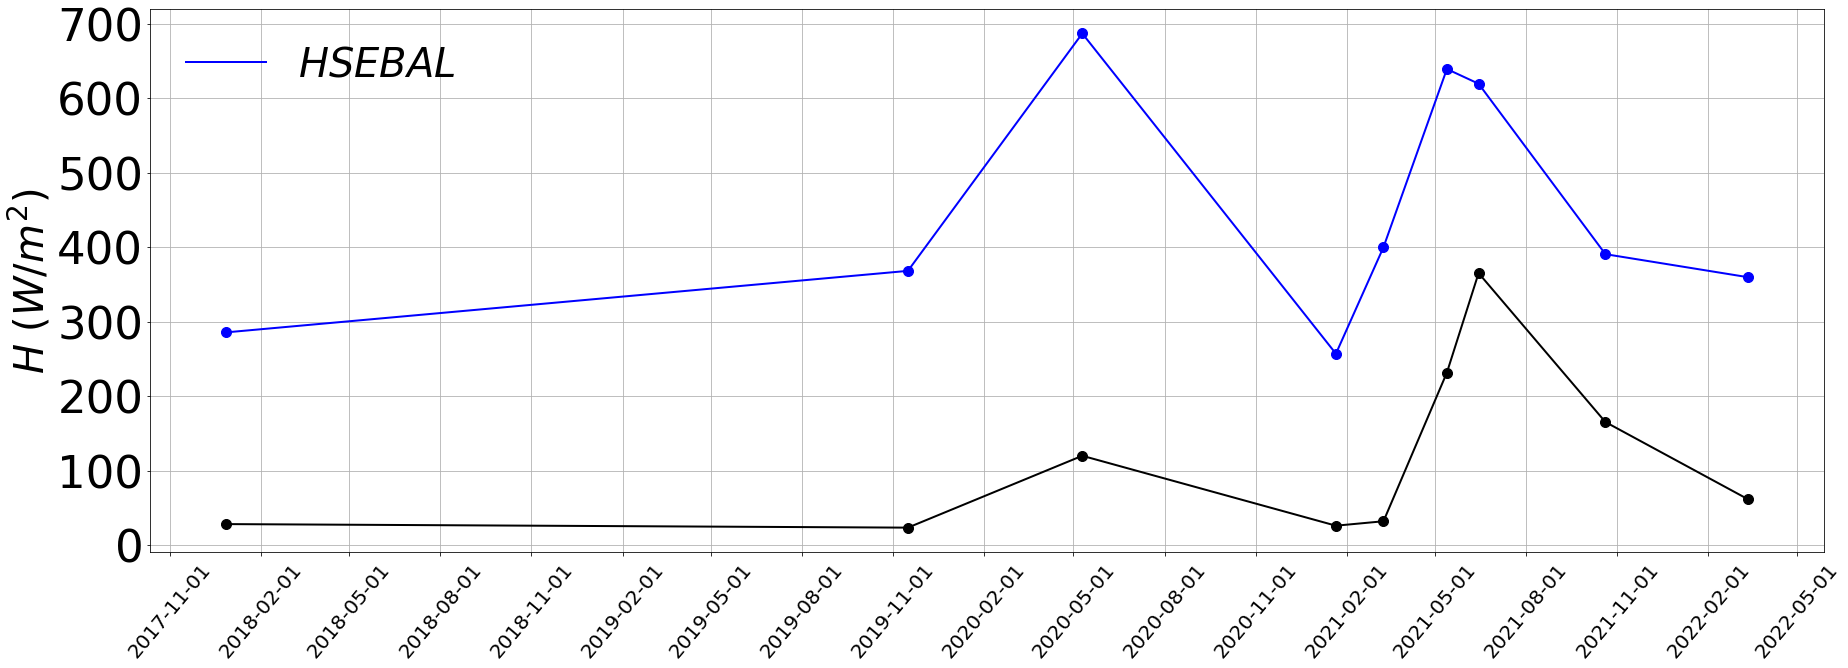

In [73]:
### Practice plots
## Plot ET timeseries 
import datetime
import matplotlib.dates as mdates
fig,ax=plt.subplots(figsize=(30,10))
from matplotlib.dates import MonthLocator, DateFormatter

date_format = mdates.DateFormatter('%d\n%b')
# ax2=ax.twinx()
# ax.plot(svt["Date"],svt['24_south'],c="b",label="$\sigma_{vv}$",linewidth=5)
# ax.plot(svt["Date"],svt['36_south'],c="r",label="$\sigma_{vv}$",linewidth=5)

# ax2.plot(lai["Date"],lai['LAI'],c="r",label="ETo Actual",linewidth=5)
ax.plot(merged_data[24]["Date"],merged_data[24]['LEinst'],c="b",label="$H SEBAL $",linewidth=2)
# ax.plot(merged_data[24]["Date"],merged_data[24]['LE']/28.36,c="c",label="ETc",linewidth=5)

# ax.plot(merged_data[24]["Date"],merged_data[24][h_col[24]],c="k",label="$H Measured$",linewidth=2)
ax.plot(merged_data[24]["Date"],merged_data[24]['LEinst'],"o",c="b",linewidth=5,markersize=10)
# ax.plot(merged_data[24]["Date"],merged_data[24]['LE']/28.36,c="c",label="ETc",linewidth=5)
# 
ax.plot(merged_data[24]["Date"], \
        merged_data[24][le_col[24]],"o",c="k",linewidth=5,markersize=10)
ax.plot(merged_data[24]["Date"], \
        merged_data[24][le_col[24]],c="k",linewidth=2)
# ax.plot(merged_data[24]["Date"],merged_data[24]['PT_ETo']/28.36,c="g",label="ETo PT",linewidth=5)
# ax.plot(merged_data[24]["Date"],merged_data[24]['ETo_SdB']/28.36,c="y",label="ETo SdB",linewidth=5)

# ax.plot(merged_data[24]["Date"],merged_data[24]['ETo_SdB'],"--",c="y",label="ETo SdB(I)",linewidth=5)
# ax.plot(merged_data[24]["Date"],merged_data[24]['ETo_Ensemble'],c="k",label="ETo Ensemble(NI)",linewidth=5)
# ax.plot(svt["Date"],svt["LE"],"--",c="m",label="Actual ET(I)",linewidth=4)
# ax.plot(merged_data[24]["Date"],merged_data[24]['LE'],"--",c="c",label="Actual ET",linewidth=5)

ax.xaxis.set_major_locator(MonthLocator(interval=90))
# ax.set_title("south svt Station",fontsize=35)
ax.set_ylabel("$H$ ($W/m^2$)",fontsize=40)
# ax.axvline(datetime.datetime(2021, 2, 25),c="g",linewidth=5,linestyle="--")

# ax.axvline(datetime.datetime(2021, 4, 9),c="g",linewidth=5,linestyle="--")
# ax.axvline(datetime.datetime(2021, 5, 14),c="g",linewidth=5,linestyle="--")

# ax.axvline(datetime.datetime(2021, 6, 10),c="g",linewidth=5,linestyle="--")
# ax.axvline(datetime.datetime(2021, 7, 12),c="g",linewidth=5,linestyle="--")
# ax.axvline(datetime.datetime(2021, 8, 14),c="g",linewidth=5,linestyle="--")

# ax.axhline(20,c="r",linewidth=5,linestyle="--")

# ax.axvline(datetime.datetime(2021, 6, 19),c="r",linewidth=5,linestyle="--")
# ax.axvline(datetime.datetime(2021, 9, 24),c="r",linewidth=5,linestyle="--")
# ax.axvline(datetime.datetime(2021, 6, 10),c="g",linewidth=5,linestyle="--")

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)
# ax.axvspan("2021-06-10","2021-07-14", facecolor='green', alpha=0.1)
# plt.savefig("C:\\Rouhin_Lenovo\\US_project\\US_Project\\CIMIS\\Figures\\EC_Station_south_yield1_actual.png",dpi=300,bbox_inches="tight")

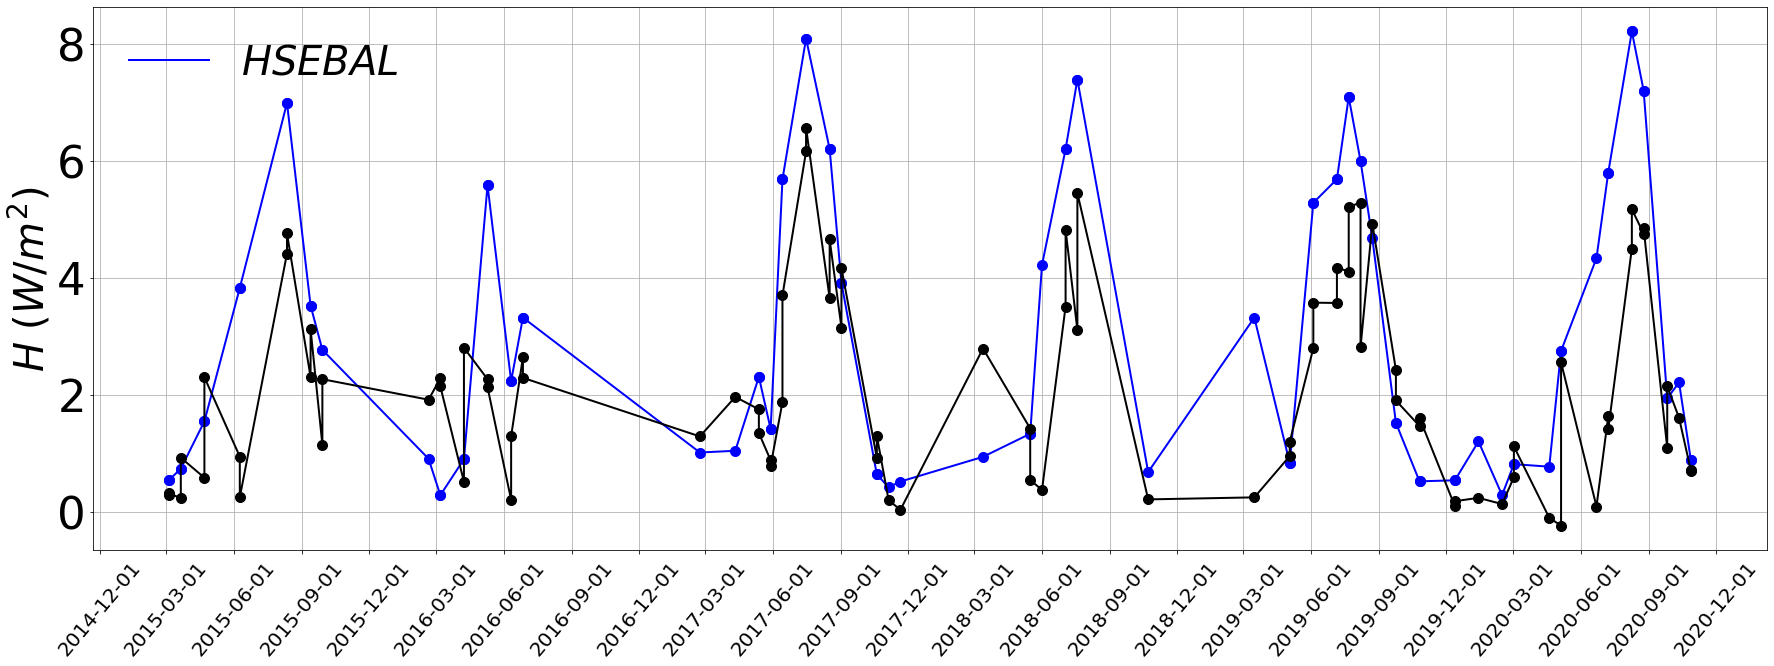

In [80]:
### 
## Plot ET timeseries 
import datetime
import matplotlib.dates as mdates
fig,ax=plt.subplots(figsize=(30,10))
from matplotlib.dates import MonthLocator, DateFormatter

date_format = mdates.DateFormatter('%d\n%b')
# ax2=ax.twinx()
# ax.plot(svt["Date"],svt['24_south'],c="b",label="$\sigma_{vv}$",linewidth=5)
# ax.plot(svt["Date"],svt['36_south'],c="r",label="$\sigma_{vv}$",linewidth=5)

# ax2.plot(lai["Date"],lai['LAI'],c="r",label="ETo Actual",linewidth=5)
ax.plot(merged_data[24]["Date"],merged_data[24]['LE_closed']/28.36,c="b",label="$H SEBAL $",linewidth=2)
# ax.plot(merged_data[24]["Date"],merged_data[24]['LE']/28.36,c="c",label="ETc",linewidth=5)

# ax.plot(merged_data[24]["Date"],merged_data[24][h_col[24]],c="k",label="$H Measured$",linewidth=2)
ax.plot(merged_data[24]["Date"],merged_data[24]['LE_closed']/28.36,"o",c="b",linewidth=5,markersize=10)
# ax.plot(merged_data[24]["Date"],merged_data[24]['LE']/28.36,c="c",label="ETc",linewidth=5)
# 
ax.plot(merged_data[24]["Date"], \
        merged_data[24]["ET_24h"],"o",c="k",linewidth=5,markersize=10)
ax.plot(merged_data[24]["Date"], \
        merged_data[24]["ET_24h"],c="k",linewidth=2)
# ax.plot(merged_data[24]["Date"],merged_data[24]['PT_ETo']/28.36,c="g",label="ETo PT",linewidth=5)
# ax.plot(merged_data[24]["Date"],merged_data[24]['ETo_SdB']/28.36,c="y",label="ETo SdB",linewidth=5)

# ax.plot(merged_data[24]["Date"],merged_data[24]['ETo_SdB'],"--",c="y",label="ETo SdB(I)",linewidth=5)
# ax.plot(merged_data[24]["Date"],merged_data[24]['ETo_Ensemble'],c="k",label="ETo Ensemble(NI)",linewidth=5)
# ax.plot(svt["Date"],svt["LE"],"--",c="m",label="Actual ET(I)",linewidth=4)
# ax.plot(merged_data[24]["Date"],merged_data[24]['LE'],"--",c="c",label="Actual ET",linewidth=5)

ax.xaxis.set_major_locator(MonthLocator(interval=90))
# ax.set_title("south svt Station",fontsize=35)
ax.set_ylabel("$H$ ($W/m^2$)",fontsize=40)
# ax.axvline(datetime.datetime(2021, 2, 25),c="g",linewidth=5,linestyle="--")

# ax.axvline(datetime.datetime(2021, 4, 9),c="g",linewidth=5,linestyle="--")
# ax.axvline(datetime.datetime(2021, 5, 14),c="g",linewidth=5,linestyle="--")

# ax.axvline(datetime.datetime(2021, 6, 10),c="g",linewidth=5,linestyle="--")
# ax.axvline(datetime.datetime(2021, 7, 12),c="g",linewidth=5,linestyle="--")
# ax.axvline(datetime.datetime(2021, 8, 14),c="g",linewidth=5,linestyle="--")

# ax.axhline(20,c="r",linewidth=5,linestyle="--")

# ax.axvline(datetime.datetime(2021, 6, 19),c="r",linewidth=5,linestyle="--")
# ax.axvline(datetime.datetime(2021, 9, 24),c="r",linewidth=5,linestyle="--")
# ax.axvline(datetime.datetime(2021, 6, 10),c="g",linewidth=5,linestyle="--")

ax.grid()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# ax.set_xticklabels(["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=45)

# # ax.set_ylim(20,220)
plt.xticks(fontsize=20,rotation=50)
plt.yticks(fontsize=45)
# plt.xticks(fontsize=25)
ax.legend(fontsize=40,loc="upper left",frameon=False)
# ax.axvspan("2021-06-10","2021-07-14", facecolor='green', alpha=0.1)
# plt.savefig("C:\\Rouhin_Lenovo\\US_project\\US_Project\\CIMIS\\Figures\\EC_Station_south_yield1_actual.png",dpi=300,bbox_inches="tight")

In [91]:
import seaborn as sns
df=pd.read_csv("C:\\Users\\rouhi\\Downloads\\Alfa_error.csv")
df.columns
df = df.drop('Unnamed: 0', axis=1)
df.columns

Index(['Albedo_error', 'tao_error', 'rs_down_error', 'lw_down_error',
       'lw_up_error', 'netrad_error', 'g_error', 'h_error', 'le_error',
       'le_d_error'],
      dtype='object')

<AxesSubplot:>

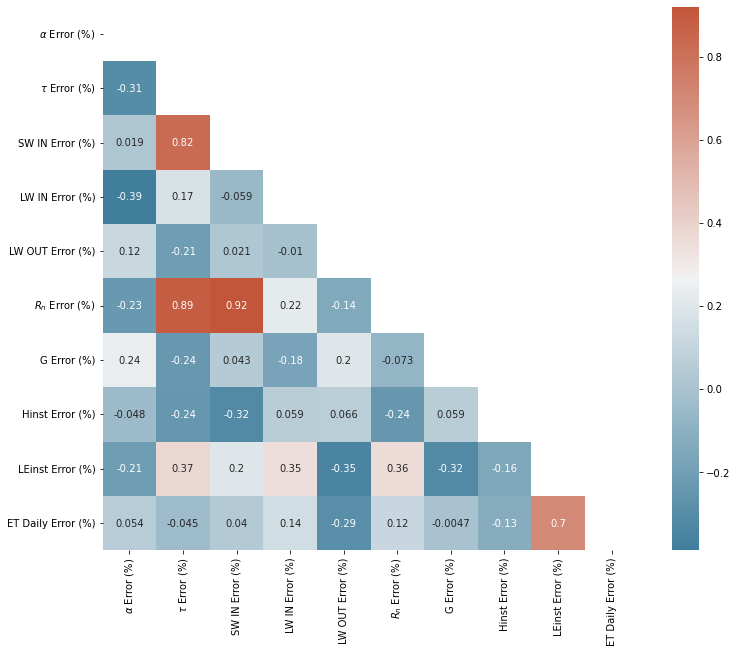

In [95]:
df.columns = [r'$ \alpha $'+" Error (%)",r'$ \tau $'+" Error (%)","SW IN Error (%)","LW IN Error (%)","LW OUT Error (%)","$R_n$ Error (%)","G Error (%)","Hinst Error (%)","LEinst Error (%)","ET Daily Error (%)"]
#
# Correlation between different variables
#
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
